In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import IPython.display as IPdisplay
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image

In [2]:
# define the initial system state (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# define the system parameters sigma, rho, and beta
sigma = 10.
rho   = 28.
beta  = 8./3.

# define the time points to solve for, evenly spaced between the start and end times
start_time = 1
end_time = 1000
interval = 100
time_points = np.linspace(start_time, end_time, end_time * interval)


# define the lorenz system
def lorenz_system(current_state, t):
    x, y, z = current_state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

xyz = [odeint(lorenz_system,initial_state,time_points)]

In [3]:
np.asarray(xyz)[-1].shape

(100000, 3)

In [6]:
# plot the system in 3 dimensions
def plot_lorenz(xyz, n):
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca(projection='3d')
#     ax.xaxis.set_pane_color((1,1,1,1))
#     ax.yaxis.set_pane_color((1,1,1,1))
#     ax.zaxis.set_pane_color((1,1,1,1))
    x = xyz[:, 0]
    y = xyz[:, 1]
    z = xyz[:, 2]
    ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.7)
    ax.set_xlim((-30,30))
    ax.set_ylim((-30,30))
    ax.set_zlim((0,50))
    ax.set_title('Lorenz system attractor')

#     plt.savefig('lstm_lorenz_rmse.png', dpi=60, bbox_inches='tight', pad_inches=0.1)
    plt.show()


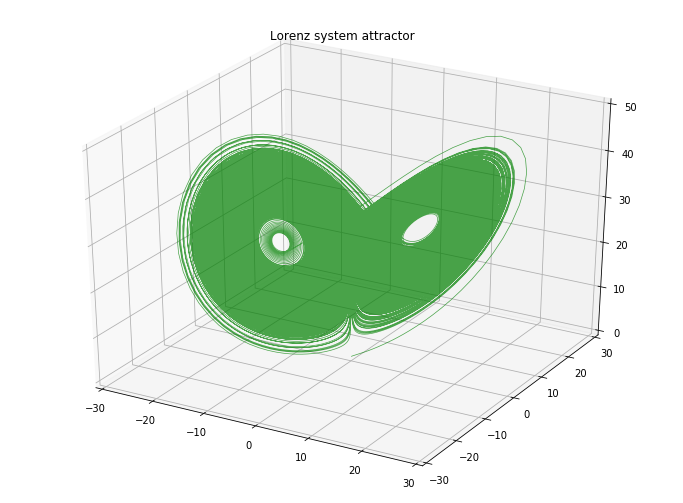

In [8]:
plot_lorenz(xyz[-1],1)

In [14]:
np.savetxt("xyz.csv", xyz[-1], delimiter=",")